# TP sur les retards de TER

## I.1) Importation des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://ressources.data.sncf.com/explore/dataset/regularite-mensuelle-ter/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false"
data = pd.read_csv(url,delimiter=";")

## I.2) Mise en forme des données

In [2]:
data = data.set_index("region")

In [3]:
data = data.rename(axis="columns", mapper={"commentaires":"explications"})

In [4]:
data

,date,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,explications
region,,,,,,,,
Bretagne,2013-01,8776.0,8631.0,145.0,554.0,93.581277,14.579422,Fortes chutes de neige ayant entrainé des pert...
Haute Normandie,2013-01,5957.0,5878.0,79.0,488.0,91.697856,11.045082,Episodes neigeux et difficultés matériels.
Nord Pas de Calais,2013-01,19227.0,18890.0,337.0,2332.0,87.654844,7.100343,Vol de câble à Lille Sud.
Picardie,2013-01,11754.0,11673.0,81.0,1245.0,89.334361,8.375904,Fortes chutes de neige ayant entrainé des pert...
Basse Normandie,2013-02,3013.0,2991.0,22.0,185.0,93.814778,15.167568,Nombreuses difficultés de circulation et plusi...
...,...,...,...,...,...,...,...,...
Grand Est,2023-08,38863.0,37897.0,966.0,2107.0,94.440193,16.986236,NaN
Nouvelle Aquitaine,2023-08,18143.0,17664.0,479.0,1706.0,90.341938,9.354045,NaN
Occitanie,2023-08,13576.0,13030.0,546.0,1721.0,86.792018,6.571180,NaN


_Nous disposons ici d'un nombre très important de données réparties sur plusieurs années.
On se propose d'étudier plus particulièrement le mois de juillet 2017 pendant lequel de fortes chaleurs ont frappé la France..._

## II.1) Description générale du mois de juillet 2017

In [5]:
data = data[data["date"]=="2017-07"]

In [6]:
nb_regions=data.shape[0]
print(f"{nb_regions} régions ont publié leurs retards en juillet 2017")

18 régions ont publié leurs retards en juillet 2017


In [7]:
data.index

Index(['Bourgogne', 'Bretagne', 'Nord Pas de Calais', 'Poitou Charentes',
       'Aquitaine', 'Centre', 'Midi Pyrénées', 'Auvergne', 'Grand Est',
       'Basse Normandie', 'Franche Comté', 'Haute Normandie',
       'Languedoc Roussillon', 'Limousin', 'Pays-de-la-Loire', 'Picardie',
       'Provence Alpes Côte d'Azur', 'Rhône Alpes'],
      dtype='object', name='region')

In [8]:
data

,date,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,explications
region,,,,,,,,
Bourgogne,2017-07,6356.0,6210.0,146.0,701.0,88.711755,7.858773,Mois impacté par des PTA ( mouvement social Bo...
Bretagne,2017-07,7493.0,7456.0,37.0,278.0,96.271459,25.820144,NaN
Nord Pas de Calais,2017-07,15164.0,14883.0,281.0,938.0,93.697507,14.866738,"un résultat de 93,7 certes au dessus de l'obje..."
Poitou Charentes,2017-07,3469.0,3442.0,27.0,423.0,87.710633,7.137116,Nouveau plan de transport lié au lancement de ...
Aquitaine,2017-07,9644.0,9465.0,179.0,1010.0,89.329107,8.371287,Le mois de juillet ayant été marqué par de nom...
Centre,2017-07,9463.0,9312.0,151.0,672.0,92.783505,12.857143,"Bien que les chiffres soient en hausse, l'obje..."
Midi Pyrénées,2017-07,7914.0,7749.0,165.0,803.0,89.637373,8.650062,"1. Intempéries, malveillance (4 244 minutes pe..."
Auvergne,2017-07,4492.0,4428.0,64.0,334.0,92.457091,12.257485,L'alériotation continue pour les trains suppri...
Grand Est,2017-07,38450.0,37803.0,647.0,1745.0,95.383964,20.663610,Des resultats regularité en progression par ra...


In [9]:
data.describe()

,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,10469.444444,10288.777778,180.666667,902.277778,90.935736,11.913698
std,9074.824712,8914.406190,176.256498,812.595899,3.743090,5.436456
min,3469.000000,3442.000000,24.000000,252.000000,81.478653,4.399175
25%,4892.250000,4811.750000,68.500000,334.000000,88.866093,7.986902
50%,7703.500000,7602.500000,137.000000,692.500000,91.781142,11.250000
75%,11137.250000,10965.750000,176.500000,913.750000,93.469007,14.364339
max,38450.000000,37803.000000,647.000000,3105.000000,96.271459,25.820144


## Commentaires

- 18 régions ont partagé leurs données en juillet 2017
- Ces régions présentent bien évidemment des réseaux et des trafics différents: en moyenne, 10 469 trains circulent par mois par région mais ce nombre varie entre 3500 et 40000. Dès lors, il est peu pertinent de s'intéresser au nombre de trains en retard ou de comparer les régions selon ce critère...
- On s'intéresse plutôt au taux de régularité, qui varie ici entre 81% et 96%.

- **Le taux de regularite moyen pour le mois de juillet 2017 était de 90,9%**

_La fin de ce TP a pour objectif de comparer les taux de régularité des différentes régions et de proposer des explications pour justifier ces différences..._

## II.2) Comparaison entre régions et explications

In [10]:
data.sort_values(by=["taux_de_regularite"])

,date,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,explications
region,,,,,,,,
Provence Alpes Côte d'Azur,2017-07,14918.0,14405.0,513.0,2668.0,81.478653,4.399175,Les résultas ont été impactés par un nombre im...
Languedoc Roussillon,2017-07,4703.0,4606.0,97.0,684.0,85.149805,5.733918,Les résultats du mois de juillet sont en baiss...
Poitou Charentes,2017-07,3469.0,3442.0,27.0,423.0,87.710633,7.137116,Nouveau plan de transport lié au lancement de ...
Rhône Alpes,2017-07,27172.0,26755.0,417.0,3105.0,88.394693,7.616747,L'alériotation continue pour les trains suppri...
Bourgogne,2017-07,6356.0,6210.0,146.0,701.0,88.711755,7.858773,Mois impacté par des PTA ( mouvement social Bo...
Aquitaine,2017-07,9644.0,9465.0,179.0,1010.0,89.329107,8.371287,Le mois de juillet ayant été marqué par de nom...
Midi Pyrénées,2017-07,7914.0,7749.0,165.0,803.0,89.637373,8.650062,"1. Intempéries, malveillance (4 244 minutes pe..."
Picardie,2017-07,9164.0,9036.0,128.0,816.0,90.969456,10.073529,Un mois en amélioration mais toujours marqué p...
Limousin,2017-07,3849.0,3755.0,94.0,334.0,91.105193,10.242515,"""De manière générale, les principaux retards e..."


In [11]:
data.loc["Provence Alpes Côte d'Azur","explications"]

"Les résultas ont été impactés par un nombre important d'évènements externes, notamment des incendies aux abords des voies, des personnes sur ou le long des voies, des bagages abandonnés, par des défaillances sur les infrastructures et une fiabilité du matériel soumis à rude épreuve par les températures caniculaires."

**Ci-dessus l'explication du taux de régularité très faible de la région PACA, région présentant le plus de retards pour le mois de juillet 2017**

In [12]:
pd.options.display.max_colwidth = 320

In [13]:
data.loc[data["taux_de_regularite"] < 90,["taux_de_regularite","explications"]]

,taux_de_regularite,explications
region,,
Bourgogne,88.711755,Mois impacté par des PTA ( mouvement social Bourgogne Nord - Difficulté de production UP NV et LAR ) Nombreuses LTv et dérangement d'installation Quelques Défaillances matériel
Poitou Charentes,87.710633,Nouveau plan de transport lié au lancement de la LGV Océane. La régularité TGV et Intercités n'est pas encore au rendez-vous ce qui génère de nombreux retards TER pour espacements et pour attentes correspondances TGV/IC.
Aquitaine,89.329107,"Le mois de juillet ayant été marqué par de nombreux dérangements de passage à niveau et des limitations de vitesse du fait des phénomènes météorologiques : fortes chaleurs, chutes d’arbres et des présences de tiers dans les emprises."
Midi Pyrénées,89.637373,"1. Intempéries, malveillance (4 244 minutes perdues) 2. Dérangements d'installations (3 268 minutes perdues) 3. Défaillance Engin moteur (2 193 minutes perdues) 4. ADC TER (1 268 minutes perdues)"
Languedoc Roussillon,85.149805,"Les résultats du mois de juillet sont en baisse. Les fortes chaleurs ont eu un impact sur le matériel(9,5%) et les installations (14,2%) . Les causes externes (29,9%) avec les incendies et les accidents de personnes ont eu le plus de conséquences sur la régularité."
Provence Alpes Côte d'Azur,81.478653,"Les résultas ont été impactés par un nombre important d'évènements externes, notamment des incendies aux abords des voies, des personnes sur ou le long des voies, des bagages abandonnés, par des défaillances sur les infrastructures et une fiabilité du matériel soumis à rude épreuve par les températures caniculaires."
Rhône Alpes,88.394693,L'alériotation continue pour les trains supprimés et les événements externes marquent les chiffres ponctualité


In [14]:
pd.options.display.max_colwidth = 100

In [15]:
data.loc["Aquitaine","explications"]

'Le mois de juillet ayant été marqué par de nombreux dérangements de passage à niveau et des limitations de vitesse du fait des phénomènes météorologiques : fortes chaleurs, chutes d’arbres et des présences de tiers dans les emprises.'

**On voit ci-dessus les régions avec le taux de ponctualité le plus faible en juillet 2017 et les explications que ces régions donnent concernant leurs retards. Une grande partie de ces derniers semblent être due aux températures caniculaires qui ont frappé la France ce mois ci. Essayons de quantifier l'impact des fortes chaleurs sur les retards:**

In [16]:
data = data.assign(impact_chaleurs = data["explications"].str.contains("températures") | data["explications"].str.contains("chaleurs"))

In [17]:
data_bis = pd.DataFrame(data["impact_chaleurs"].value_counts())

In [18]:
data_bis

,count
impact_chaleurs,
False,12
True,6


<Axes: title={'center': 'Une partie des retards est due aux fortes chaleurs de juillet'}, ylabel='count'>

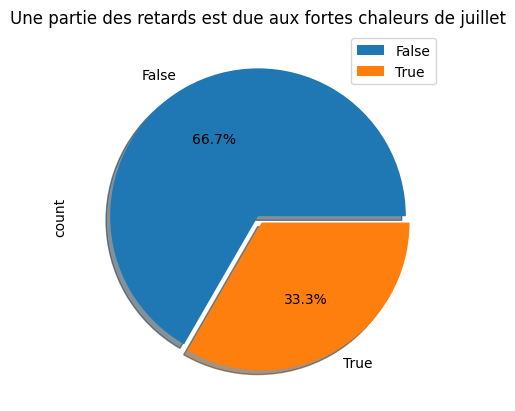

In [19]:
data_bis.plot.pie(y = "count", title = "Une partie des retards est due aux fortes chaleurs de juillet", autopct='%1.1f%%',explode=(0,0.05),shadow=True)

**Le graphique montre qu'un tiers des régions (et non pas des retards...) a été impacté par les fortes chaleurs du mois de juillet 2017 dans la ponctualité de leurs trains !
Pour avoir le détail des régions impactées:**

data.query("impact_chaleurs")

*On remarque que ces régions ne sont pas toutes dans le Sud.
Il faut également prendre en compte que certaines régions ont parlé de "causes externes" sans plus de précisions, elles n'ont pas été comptabilisées ici...
Par exemple:*

In [20]:
data.loc["Rhône Alpes","explications"]

"L'alériotation continue pour les trains supprimés et les événements externes marquent les chiffres ponctualité"

## III- Conclusion

_En conclusion, il apparaît clairement que le taux de régularité des TER SNCF n'est pas une constante temporelle ni nationale. Les régions de France présentent des performances très différentes concernant les retards de leurs trains dont le taux de régularité peut varier de presque 20 points de pourcentage d'une région à l'autre. Néanmoins, ces résultats restent centrés sur une valeur moyenne d'environ 90%, et ce d'une année sur l'autre.
Une étude plus précise du mois de juillet 2017 montre que de nombreux retards proviennent de causes externes. Si nous avons mis ici en évidence l'impact des températures caniculaires qui ont frappé la France à cette époque, de nombreuses causes externenes peuvent également impacter le trafic comme les accidents de personnes ou les chocs avec les animaux.
La SNCF déploie alors des stratégies de protection de ses infrastructures afin de limiter ces retards._

# Commentaires (Hors TP)

- **Temps passé: entre 3 heures et 5 heures**
- Commandes qui ne marchaient pas et où je n'ai pas réussi à résoudre le problème:

In [21]:
data["impact_chaleurs_nouveau"] = data["impact_chaleurs"].replace({"True":"Vrai","False":"Faux"}).fillna("non rempli")

1) Cela ne change pas les noms des réponses... --> Problème résolu en cours

2) Je n'arrive pas à afficher les explications entières (sans qu'elles soient coupées car les cases sont trop petites) à la ligne 12
   --> Problème résolu en cours